### Regresión lineal en el conjunto de datos de vivienda de Boston

En mi blog anterior , cubrí los conceptos básicos de la regresión lineal y el descenso de gradientes. Para obtener una regresión lineal práctica, tomaremos un conjunto de datos original y aplicaremos los conceptos que hemos aprendido.
Tomaremos el conjunto de datos de Vivienda, que contiene información sobre D i casas ferentes en Boston. Estos datos originalmente formaban parte del Repositorio de aprendizaje automático de UCI y ahora se han eliminado. También podemos acceder a estos datos desde la biblioteca scikit-learn. Hay 506 muestras y 13 variables de características en este conjunto de datos. El objetivo es predecir el valor de los precios de la casa utilizando las características dadas.
Entonces empecemos.

Primero, importaremos las bibliotecas necesarias.

Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.


OverallQual: Overall material and finish quality, rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
       
1stFlrSF: First Floor square feet

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

YearBuilt: Original construction date

LotFrontage: Linear feet of street connected to property


In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn import linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline

A continuación, cargaremos los datos de vivienda de la biblioteca scikit-learn y los entenderemos.

In [2]:
# Cargar los datos 
datos = np.load("proyecto_training_data.npy")
datosnumpy = np.load("proyecto_training_data.npy")
df=pd.DataFrame(datos,columns=["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"])
df.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [3]:
df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002096C281488>,
      dtype=object)

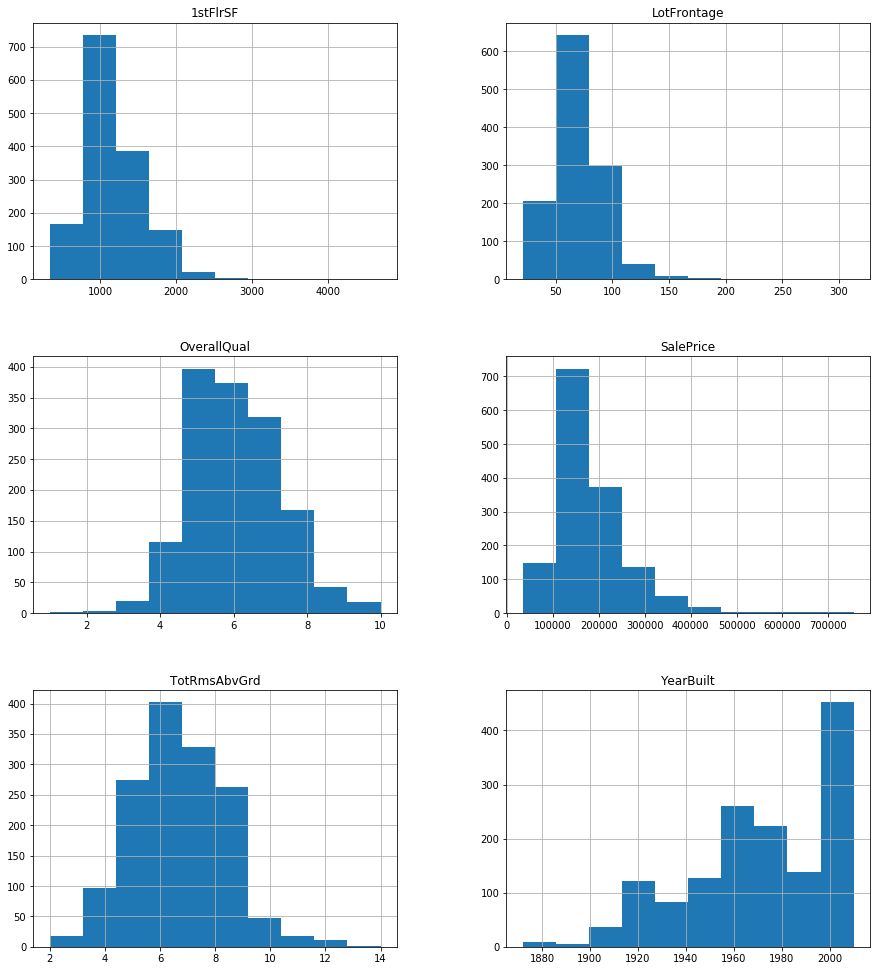

In [4]:
df.hist(figsize=(15,17))


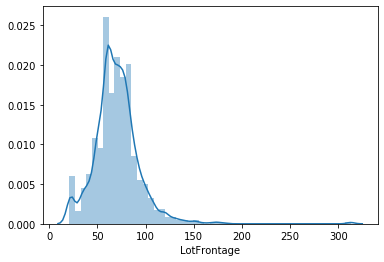

In [5]:
sns.distplot(df["LotFrontage"])

In [6]:
y=df["SalePrice"]

In [7]:
df.drop(["SalePrice"],axis=1,inplace=True) #quitamos la columna saleprice = y

In [9]:
X=datosnumpy[:,1:]
y=datosnumpy[:,0]
X.shape
print(X.shape)

(1460, 5)


In [4]:
spl=0.8
n=len(y)
sample=int(spl*n)

X_train, X_test, y_train, y_test = X[:sample,:],X[sample:,:], y[:sample],y[sample:] # tomar de 0 a 80% - tomar de 80% en adelante 

In [13]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [5]:
oqtrain=X_train[:,0].reshape(-1,1)
oqtest=X_test[:,0].reshape(-1,1)
pisotrain=X_train[:,1].reshape(-1,1)
pisotest=X_test[:,1].reshape(-1,1)
cuartotrain=X_train[:,2].reshape(-1,1)
cuartotest=X_test[:,2].reshape(-1,1)
aniotrain=X_train[:,3].reshape(-1,1)
aniotest=X_test[:,3].reshape(-1,1)
piestrain=X_train[:,4].reshape(-1,1)
piestest=X_test[:,4].reshape(-1,1)

In [27]:
def funcion_costo(X, y, theta):
    h = X @ theta
    return ((y - h) ** 2).sum() / (2 * len(X))

def costo_gradiente(X, y, theta):
    h = X @ theta
    return (X.T @ (h - y)) / len(X)

def descenso_gradiente(X, y, theta_0, linear_function, linear_gradient, learning_rate=0.0000001, threshold= 2, max_iter=1000, imprimir_error_cada=None):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []
    n=len(X)
    columna_unos=np.ones((n,1))
    X = np.hstack(
        (columna_unos,X)
    )

    while np.linalg.norm(linear_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta = theta - learning_rate * linear_gradient(X, y, theta)
        costs.append(linear_function(X, y, theta))
        thetas.append(theta.copy())

                
    return theta, costs, thetas, X

In [ ]:
        if imprimir_error_cada != None:
            if iteration%imprimir_error_cada == 0:
                print(costs[iteration])

In [28]:
valores_m=np.random.rand(2,1)
valores_m

array([[0.50674805],
       [0.66669826]])

In [29]:
thetas_arr, costs_arr, thetas1, x_procesado = gradient_descent_cost(oqtrain,y_train, valores_m, linear_function_cost, linear_gradient_cost, imprimir_error_cada=500)

In [30]:
thetas_arr

array([[ 18.52826437],
       [119.22123784]])

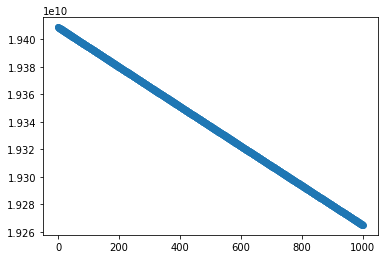

In [31]:
xrow = np.arange(0,1000,1).reshape(-1,1)
plt.scatter(xrow, costs_arr)
plt.show()

In [18]:
costs_arr[-1]

19265047945.092506

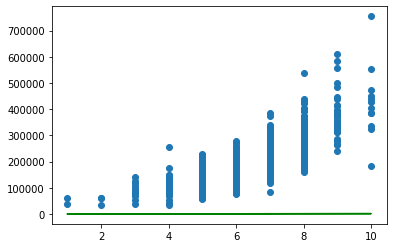

In [22]:
plt.scatter(x_procesado[:,1], y_train)
plt.plot(x_procesado[:,1], x_procesado @ thetas_arr, color='green')
plt.show()

# --------------------------------------------------------------------

In [ ]:

import random #Paquete random
​
SIMULACIONES = 1000
iteracion = 1
y_maximo = float("-inf") #Asignar (-) Infinito para asignar el valor más pequeño posible
y_minimo = float("inf")
ys_simulados = [] 
​
while iteracion <= SIMULACIONES:
    x_simulado = random.gauss(5,2) # sampleo/muestreo de la variable x
    y = 2*x_simulado + 3 #aplicar el modelo a la variable "simulada"
    ys_simulados.append(y) # Agregar elementos a una lista
    y_maximo = max(y_maximo,y) #en cada iteracion determinar el maximo encontrado
    
    iteracion +=1
    
print("El valor maximo de y es ",y_maximo)

#--------------------------Resultado--------------------------
#
#El valor maximo de y es  30.105166202117843

plt.hist(ys_simulados)
plt.show()

# Ejemplo En machine learning, el tipo mas comun llamado "supervisado" consiste en utilizar un set de datos 
# llamado "de entrenamiento" para encontrar una función que aproxime la relación entre una o varias variables 
# independientes x a una variable dependiente y a traves de un proceso de optimización llamado "entrenamiento", 
# en este proceso de entrenamiento ejecutados en repetidas ocasiones el proceos de optimización sobre el mismo 
# set de datos, a cada "pasada" por el set de datos se le conoce como "epoch".

def entrenar(x,y):
    pass # por ahora no hace nada
x = 1
y = 2
​
EPOCHS = 25 # Numero de iteracciones
epoch = 1
​
while epoch <= EPOCHS: #Episodio = 1 ciclo = Epoch
    entrenar(x,y)
    
    if epoch % 5 == 0: # validando la división modular (múltiplo de 5)
        print("Terminando epoch :",epoch)
    epoch+=1
    
print("Se ha terminado el proceso de entrenamiento")

#--------------------------Resultado--------------------------
#
#Terminando epoch : 5
#Terminando epoch : 10
#Terminando epoch : 15
#Terminando epoch : 20
#Terminando epoch : 25
#Se ha terminado el proceso de entrenamiento

# --break--
# Ejemplo En el siguiente ejemplo, tenemos las dimensiones de una matriz y queremos imprimir las 
# coordenadas de un elemento dado luego de haber recorrido N elementos en la matriz(aún no hemos 
# visto matrices por lo cual solo haremos la lógica básica y ya que no necesitamos el valor del 
# elemento en la matrix solo sus coordenadas, podemos hacerlo aún sin tener la matríx).

# Para este ejemplo veremos "anidamiento", tendremos un ciclo anidado en otro ciclo.

filas = 5
columnas = 5

N = 4

recorridos = 1
encontrado = False

i = 0
while i < filas:
    j = 0
    while j < columnas:
        if recorridos == N :
            print("Fila",i,"columna",j)
            encontrado = True
            break
            
        j+=1
        recorridos+=1
    
    if encontrado:
        break
    i+=1
continue


# ejemplo en ciencia de datos, en machine learning es comun "evaluar" nuestros algoritmos en un 
# dataset de pruebas o evaluacion cada cierto numero N definido de iteraciones(o EPOCHS) pero no 
# en cada iteracion ya que es una operacion computacionalmente costosa,en este ejemplo usamos "continue" 
# para "saltarnos" (ignorar) la evaluacion salvo para algunas iteraciones.

def entrenar(x,y):
    pass # por ahora no hace nada


def evaluar(x,y,epoch):
    print("evaluando modelo ,epoch: ",epoch)
    pass # por ahora no hace nada

def entrenar(x,y):
    pass # por ahora no hace nada


def evaluar(x,y,epoch):
    print("evaluando modelo ,epoch: ",epoch)
    pass # por ahora no hace nada

EPOCHS = 100
N = 10
epoch = 0
​
x_train = 1
y_train = 2
​
x_eval = 1
y_eval = 2
​
while epoch <= EPOCHS:
    epoch+=1
    
    entrenar(x_train,y_train)
    
    if epoch % N != 0:
        continue
        
    evaluar(x_eval,y_eval,epoch)
    
#--------------------------Resultado--------------------------
#    
#evaluando modelo ,epoch:  10
#evaluando modelo ,epoch:  20
#evaluando modelo ,epoch:  30
#evaluando modelo ,epoch:  40
#evaluando modelo ,epoch:  50
#evaluando modelo ,epoch:  60
#evaluando modelo ,epoch:  70
#evaluando modelo ,epoch:  80
#evaluando modelo ,epoch:  90
#evaluando modelo ,epoch:  100


In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# EPOCHS: --------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

x = 1
y = 2

EPOCHS = 25 # Numero de iteracciones
epoch = 1

while epoch <= EPOCHS: #Episodio = 1 ciclo = Epoch
    entrenar(x,y)
    
    if epoch % 5 == 0: # validando la división modular (múltiplo de 5)
        print("Terminando epoch :",epoch)
    epoch+=1
    
print("Se ha terminado el proceso de entrenamiento")

#-----------------------------------------------------------------------------------------------------------------

def entrenar(x,y):
    pass # por ahora no hace nada


def evaluar(x,y,epoch):
    print("evaluando modelo ,epoch: ",epoch)
    pass # por ahora no hace nada


In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# FOR: -----------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

for i in range(0,5,1):
    print(i)
#-----------------------------------------------------------------------------------------------------------------

for i in range(0,5):
    print(i)
    print(i+5)
    print("--------------")


In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# ANÁLISIS EXPLORATORIO DE DATOS: --------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

x = np.array([1,2,3,4,5])
y = np.array([2.6,3.9,6.25,7.6,11])

fig = plt.figure()
ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
#ax = fig.add_subplot(111) 

# experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'#
ax.scatter(x, y,marker="*",color="g")  

# experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'
#ax.scatter(x, y,color="g")  

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot python')

plt.show()


In [ ]:
#-----------------------------------------------------------------------------------------------------------------
xv = np.linspace(-10,10,5)
yv = np.linspace(-10,10,5)

xx,yy = np.meshgrid(xv,yv) # creamos el grid con las coordenadas en el plano x,y

# calculamos el valor de evaluar la función z = f(x,y) sobre las coordenadas en el plano
z = xx**2 + yy**2  

# imprimimos la matriz resultado de calcular f(x,y), 
#cuando estudiemos visualización de datos esta matriz sería graficada
print(z)


In [ ]:
""
Funciones como objetos :              
	https://www.youtube.com/watch?v=RgqZHu-pzbE
	https://www.youtube.com/watch?v=df6ZWB0cpGk
Funciones como argumentos/parametros: https://www.youtube.com/watch?v=QaOHeMnpnmU
""

In [ ]:
#-----------------------------------------------------------------------------------------------------------------
# REGRESIÓN LINEAL: ----------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------

Este es el concepto básico de regresión lineal y sirve para que la linea de tendencia toque la mayor cantidad de puntos posibles...

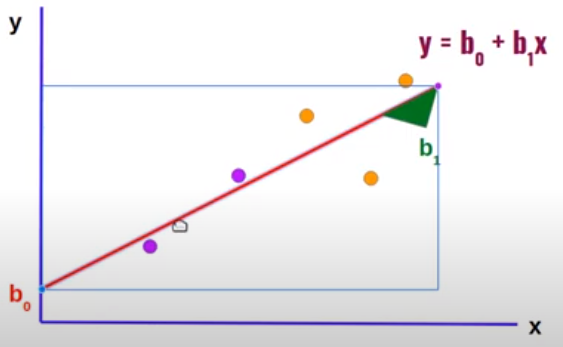

Primero resolveremos encontrar b0 y b1: 

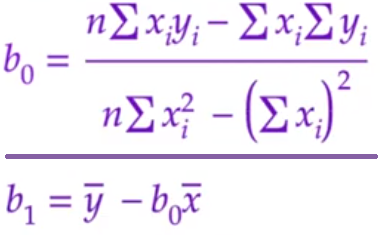

In [ ]:
import pandas as pd
df=pd.read_cvs('anova.cvs')
sx=df['x'].sum()
sy=df['y'].sum()
df['x2']=sf['x'].apply(lamda x: pow(x,2))
df['y2']=sf['y'].apply(lamda x: pow(x,2))
s2x=df['x2'].sum()
s2y=df['y2'].sum()
df['xy']=df['x']*df['y']
sxy=df['xy'].sum()
n=len(df['x'])
xp=(df['x'].mean())
yp=[df['y'].mean())
b1=(sxy-(1/n)*(sx*sy)) / ((s2x)-(1/n)*pow(sx,2))
b0=yp-b1*xp

print("b1: ",b1)
print("b0: ",b0)

import statsmodels.formula.api as smf
reg=smf.ols('y~x', data=df)
res=reg.fit()
print("Parámetros: ") 
print(re.params)


Calcular las tres sumas de cuadrados de la regresión y su comprobación con statsmodel
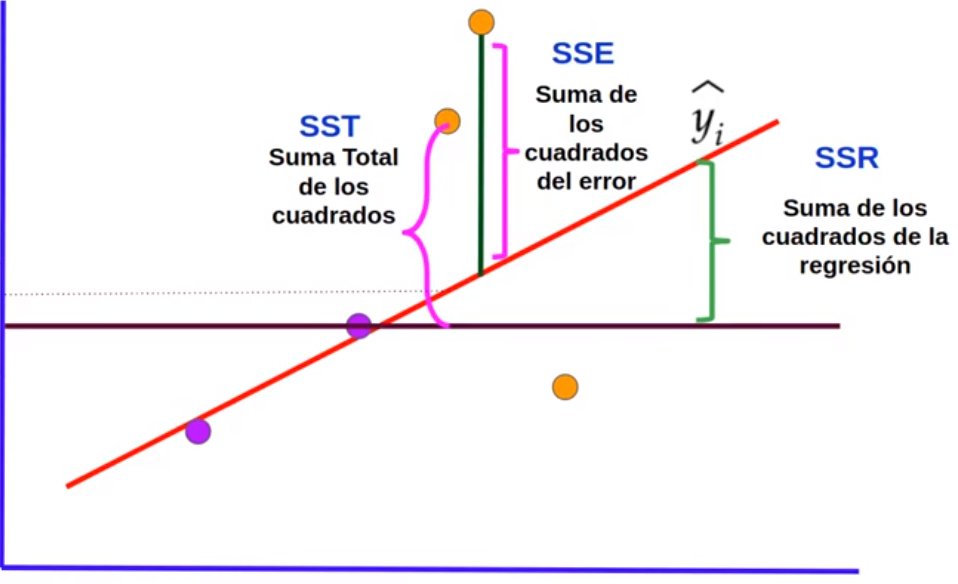

Empecemos calculando SSR
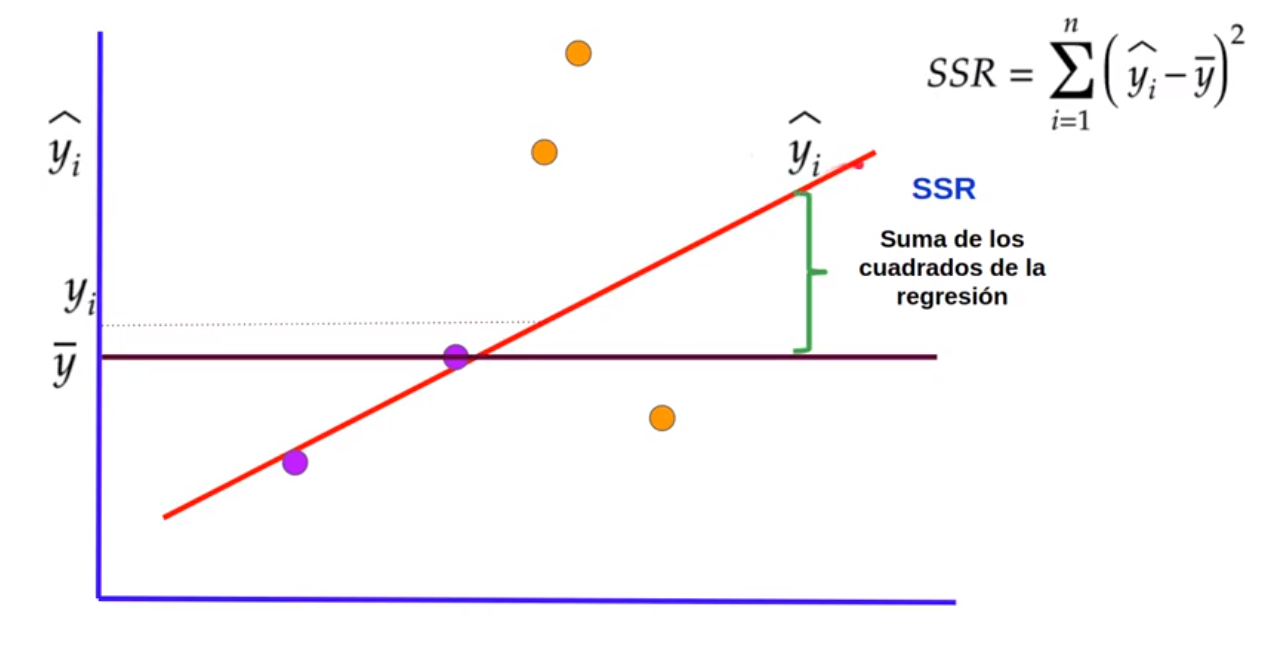

In [ ]:
# SSR
df['ypro']=df['ypre'].apply(lambda x: x-yp)
df['ypro']=df['ypro'].apply(lambda x: pow(x,2))
print("SSR ",df['ypro'].sum())
ssr=b1*(sxy-(1/n)*sx*sy)
print("SSR: ",ssr)
print("SSRsm: ",round(res.mse_model,0))

Ahora calculemos SSE
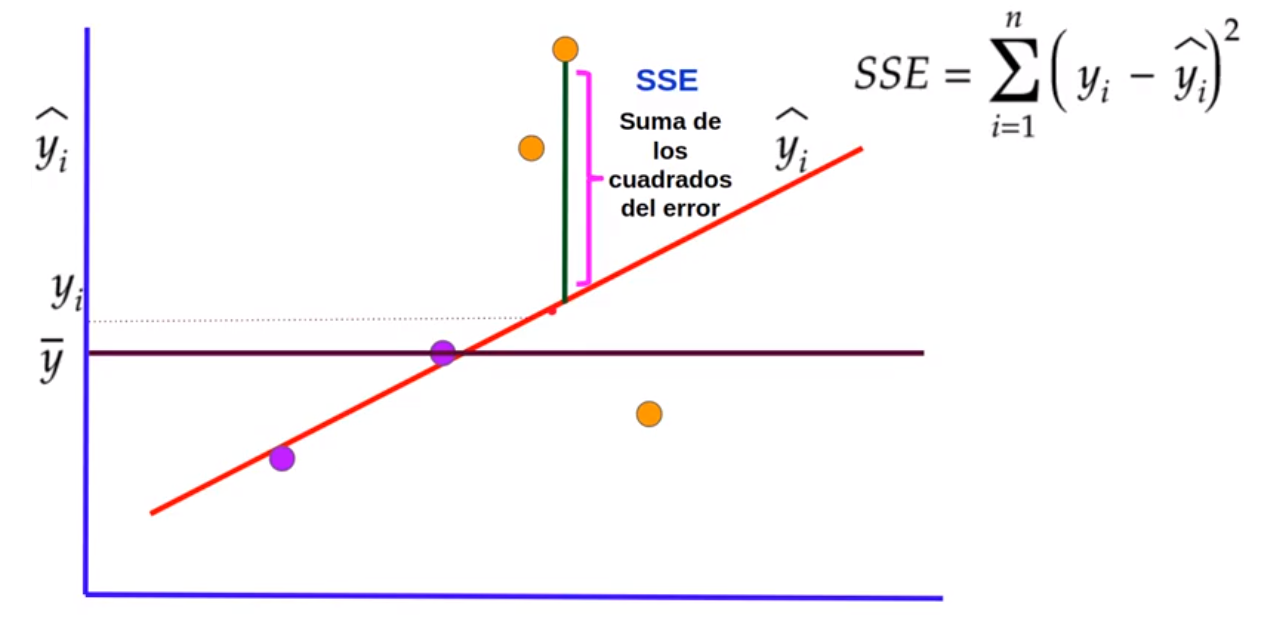

In [ ]:
#SSE
df['resta']=df['y']-df['ypre']
df['resta']=df['resta'].apply(lambda x: pow(x,2))
print("SSE ",df['resta'].sum())
print("SSRsm: ",round(res.ssr,0))

Ahora calculemos SST
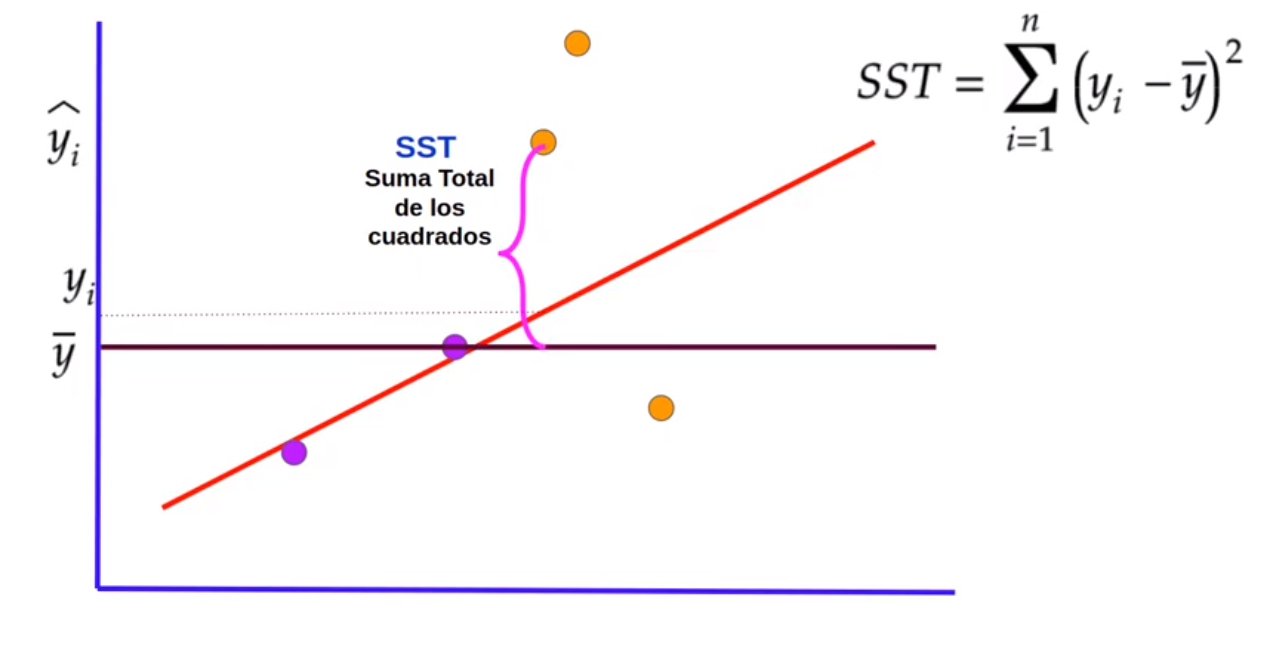

In [ ]:
#SST
df['yr']=df['y'].apply(lambda x: x-yp)
df['yr']=df['yr'].apply(lambda x: pow(x,2))
print("SST ",df['yr'].sum())
sst=s2y-(1/n)*pow(sy,2) 
print("SST: ",sst)
sst2=ssr+df['resta'].sum()
print("SST: ",sst2)

Ahora calculemos la tabla ANOVA
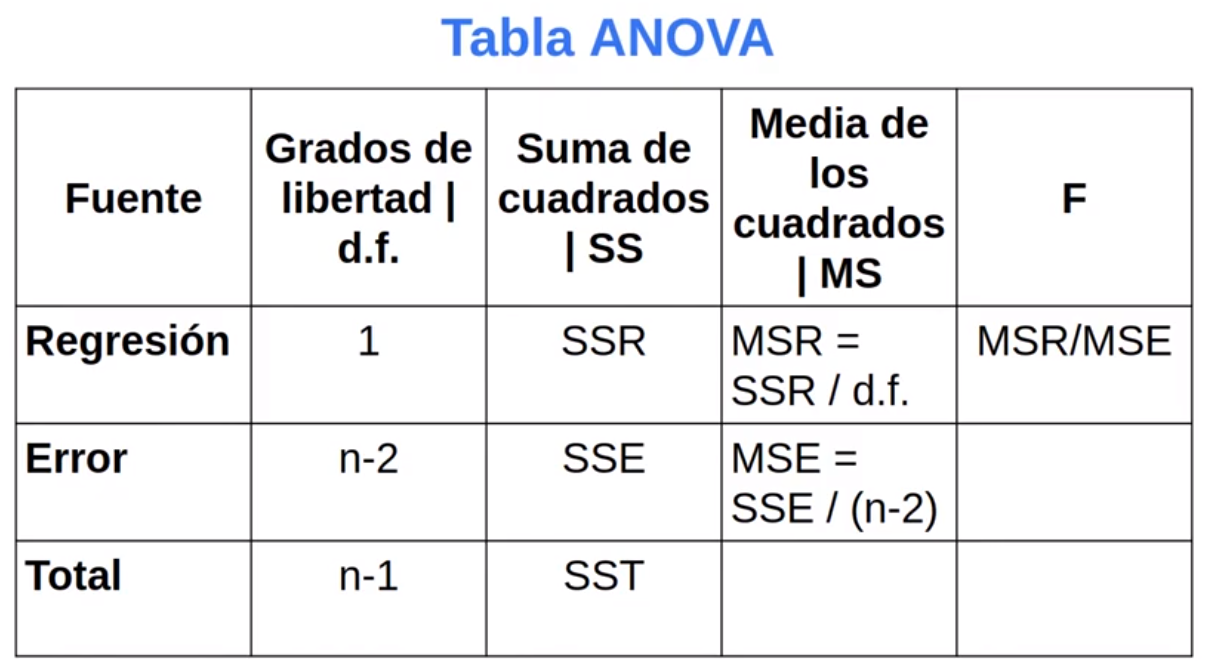

In [ ]:
#TABLA ANOVA
import math
print("Se: ",round(math.sqrt(MSE),3))
msr=ssr/1
print("MSR: ",msr)

from texttable import Texttable
t=Texttable()
t.add_rows([['Fuente','df','SS','MS','F'],
            ['Regresión',1,ssr,msr,msr/MSE],
            ['Error',n-2,SSE,SSE/(n-2),''],
            ['Total',n-1,sst,'','']
           ])
print(t.draw())

import statsmodels.api as sm
anova=sm.stats.anova_lm(res,typ=2)
print(anova)
